# Perturbation Stuff

In [3]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts

In [4]:
import glob
import datetime
import scipy.io
import scipy.signal
import numpy as np
import netCDF4 as nc
import cartopy.feature
import cartopy.crs as ccrs # ccrs
#import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [5]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue

# Model Output

In [6]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/SPIN06_SET02_1m_20020101_20131231_ptrc_T.nc'

In [7]:
ptrc_obj = nc.Dataset(FName)
Ba = np.squeeze(ptrc_obj.variables['Ba'][:, 0, :, :])
d18O = np.squeeze(ptrc_obj.variables['d18O'][:, 0, :, :])
nav_lat = ptrc_obj.variables['nav_lat'][:]
nav_lon = ptrc_obj.variables['nav_lon'][:]
deptht = ptrc_obj.variables['deptht'][:]

# "Regions"

In [21]:
rf_name=glob.glob('_data/Samples/STN-30p/runoff_id_modified.mat')
rf_obj=scipy.io.loadmat(rf_name[0])
rf_id=rf_obj['rf_id']
rf_lon=rf_obj['lon']
rf_lat=rf_obj['lat']

In [22]:
rf_id[rf_id==2]=0 # 0 is Central Arctic

In [31]:
Ba_temp = Ba[0, :, :]
Class_interp = Nts.reporj_NEMOgrid(rf_lon, rf_lat, rf_id, nav_lon, nav_lat, method='nearest')
Class_range = Nts.reporj_NEMOgrid(rf_lon, rf_lat, rf_id, nav_lon, nav_lat, method='linear')
Class_interp[np.isnan(Class_range)] = np.nan
Class_interp[Ba_temp==0] = np.nan
Class_masked = np.ma.masked_where(np.isnan(Class_interp), Class_interp)

In [113]:
regions=["Central Arctic",    \
        "Arctic Archipelago", \
        "Baffin Bay",         \
        "Barents Sea",        \
        "Beaufort Sea",       \
        "Bering Strait",      \
        "Chukchi Sea",        \
        "East Siberian Sea",  \
        "Foxe Basin",         \
        "Hudson Bay",         \
        "Hudson Strait",      \
        "Kara Sea",           \
        "Laptev Sea",         \
        "Norwegian Sea",      \
        "Greenland Sea",\
        "South Greenland Sea"]

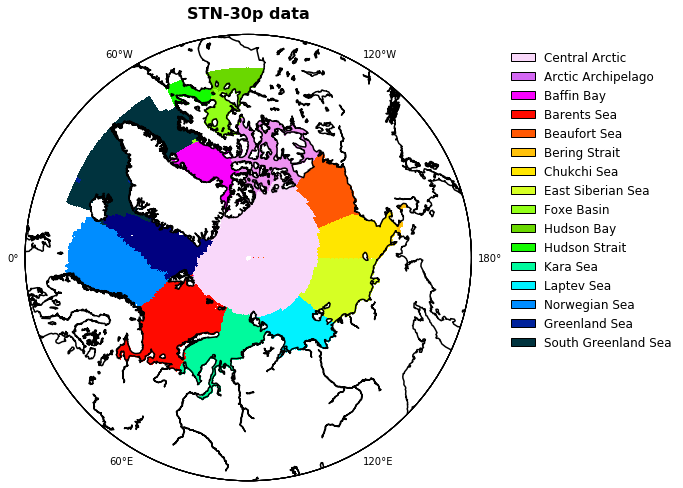

In [121]:
CMap=plt.cm.gist_ncar_r
var_name='Runoff Classification'
clev=np.array([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])-0.5
rf_id_masked=np.ma.masked_where(np.isnan(rf_id), rf_id)
#
fig, ax, proj = Nts.plot_Arctic_LandCover(nav_lon, nav_lat, 55, Class_masked, clev, regions, CMap, var_name)
#    
title='STN-30p data'
ax.set_title(title, fontsize=16, fontweight='bold', y=1.025)
fig.set_size_inches(8, 8)
fig.canvas.draw()

# Time series @ each region

In [51]:
Ba_series = np.zeros([144, 17])
for i in range(17):
    Ba_series[:, i] = np.nanmean(Ba[:, Class_interp==i], 1)

/home/yingkai/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [60]:
from dateutil.relativedelta import relativedelta

base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [115]:
set1 = [1, 3, 5];   label1 = ['Arctic Archipelago', 'Baffin Bay' , 'Beaufort Sea']
set2 = [6, 7, 8];   label2 = ['Bering Strait'     , 'Chukchi Sea', 'East Siberian Sea']
set3 = [4, 12, 13]; label3 = ['Barents Sea'       , 'Kara Sea'   , 'Laptev Sea']

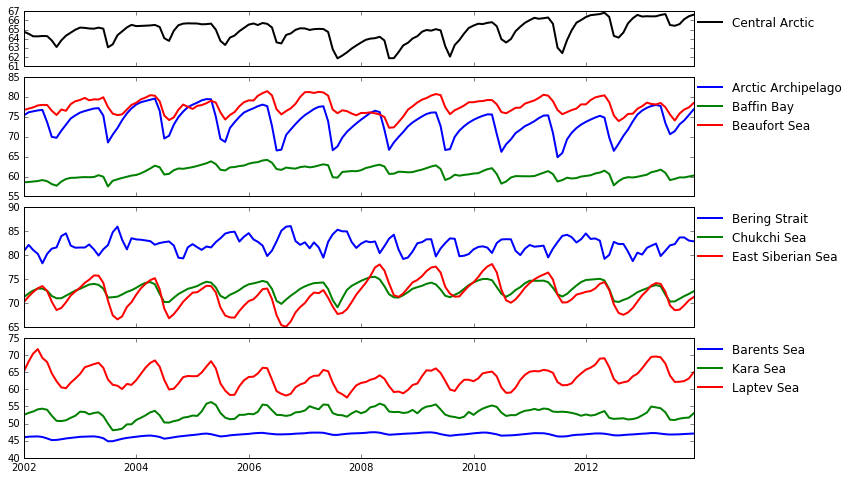

In [116]:
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid((7, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((7, 1), (1, 0), colspan=1, rowspan=2)
ax3 = plt.subplot2grid((7, 1), (3, 0), colspan=1, rowspan=2)
ax4 = plt.subplot2grid((7, 1), (5, 0), colspan=1, rowspan=2)

ax1.plot(date_list, Ba_series[:, 0], 'k-', lw=2, label='Central Arctic')
ax1.tick_params(labelbottom='off') 
LG = ax1.legend(numpoints=1, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)

for i in range(3):
    ax2.plot(date_list, Ba_series[:, set1[i]], lw=2, label=label1[i])
    ax3.plot(date_list, Ba_series[:, set2[i]], lw=2, label=label2[i])
    ax4.plot(date_list, Ba_series[:, set3[i]], lw=2, label=label3[i])
ax2.tick_params(labelbottom='off')
ax3.tick_params(labelbottom='off') 
LG = ax2.legend(numpoints=1, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
LG = ax3.legend(numpoints=1, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
LG = ax4.legend(numpoints=1, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)

# Pertrubed Regions

In [132]:
perturb_class = np.zeros(nav_lat.shape)
perturb_class[Class_interp == 0] = 1
perturb_class[Class_interp == 1] = 2
perturb_class[Class_interp == 5] = 2
perturb_class[Class_interp == 7] = 3
perturb_class[Class_interp == 8] = 3
perturb_class[Class_interp == 12] = 5
perturb_class[Class_interp == 13] = 4
perturb_class[Class_interp == 4] = 6
perturb_class[perturb_class == 0] = np.nan

names = ['Central Arctic', 'CAA + Beaufort', 'Chukchi + East Siberian', 'Laptev Sea', 'Kara Sea', 'Barents Sea']

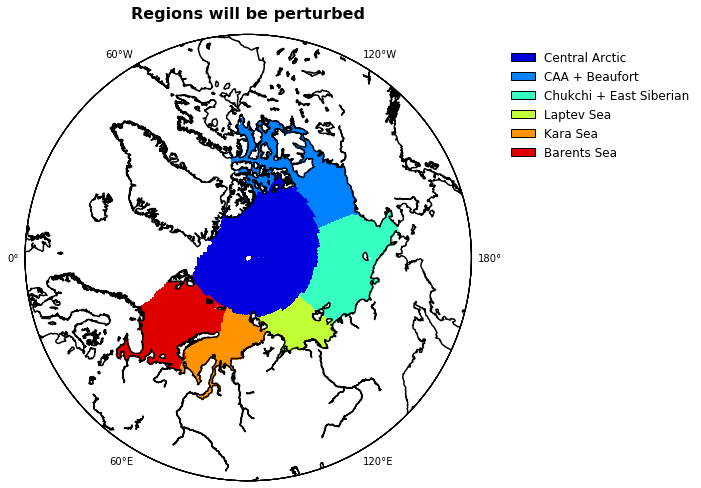

In [133]:
CMap=plt.cm.jet
var_name='Perturb regions'
clev_p=np.array([1, 2, 3, 4, 5, 6, 7])-0.5
perturb_class_masked=np.ma.masked_where(np.isnan(perturb_class), perturb_class)
#
fig, ax, proj = Nts.plot_Arctic_LandCover(nav_lon, nav_lat, 55, perturb_class_masked, clev_p, names, CMap, var_name)
#    
title='Regions will be perturbed'
ax.set_title(title, fontsize=16, fontweight='bold', y=1.025)
fig.set_size_inches(8, 8)
fig.canvas.draw()

In [140]:
total_std = np.nanstd(Ba_series, 0)
print(total_std)

[ 1.16889882  3.44076482         nan  1.45355758  0.55718595  1.92138248
  1.57750607  1.42323647  2.88692209  2.06586853  0.93041187  1.27322692
  1.52827073  2.95762317  0.22723168  0.60615794  0.6228191 ]


In [173]:
std1 = total_std[0]
std2 = total_std[1]
std3 = total_std[8]
std4 = total_std[12]
std5 = total_std[13]
std6 = total_std[4]

In [174]:
region1 = np.random.normal(0, std1, nav_lon.shape)
region2 = np.random.normal(0, std2, nav_lon.shape)
region3 = np.random.normal(0, std3, nav_lon.shape)
region4 = np.random.normal(0, std4, nav_lon.shape)
region5 = np.random.normal(0, std5, nav_lon.shape)
region6 = np.random.normal(0, std6, nav_lon.shape)

In [175]:
noise_pattern = np.zeros(nav_lon.shape)
noise_pattern[perturb_class==1] = region1[perturb_class==1]
noise_pattern[perturb_class==2] = region2[perturb_class==2]
noise_pattern[perturb_class==3] = region3[perturb_class==3]
noise_pattern[perturb_class==4] = region4[perturb_class==4]
noise_pattern[perturb_class==5] = region5[perturb_class==5]
noise_pattern[perturb_class==6] = region6[perturb_class==6]

In [176]:
np.max(np.abs(noise_pattern))

13.937551175624879

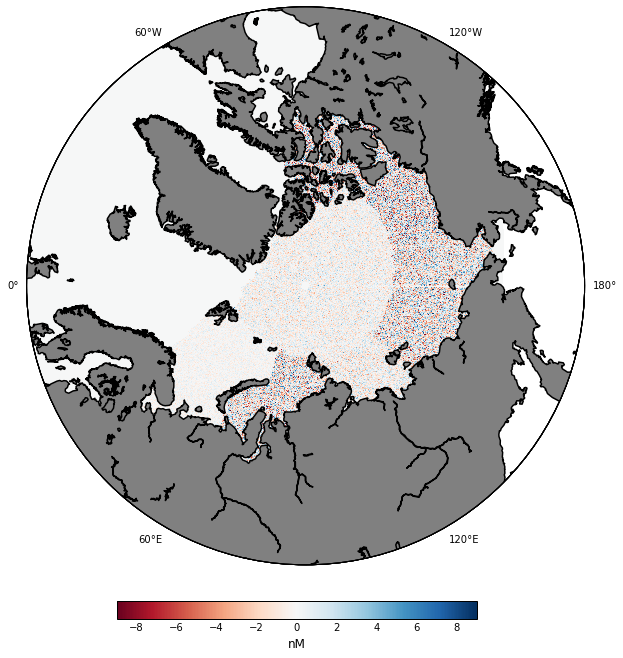

In [177]:
fig=plt.figure(figsize=(10, 10));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.pcolor(x, y, noise_pattern, vmin=-9, vmax=9, cmap=plt.cm.RdBu)

cax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=0)

In [178]:
for i in range(1, 7):
    print(np.nanmean(noise_pattern[perturb_class==i]))

0.00373031860166
0.000769969553052
0.0492995141727
-0.033375902306
-0.00311803047488
-0.00578845187285
